# TMDB Box Office Prediction

#### Can you predict a movie's worldwide box office revenue?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast
import json
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## EDA

In [4]:
#num of null values in each column
df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [5]:
dict_cols = ['belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages','Keywords', 'cast', 'crew']
def str_to_dict(df):
    for column in dict_cols:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

In [6]:
df = str_to_dict(df)

In [7]:
df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [8]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


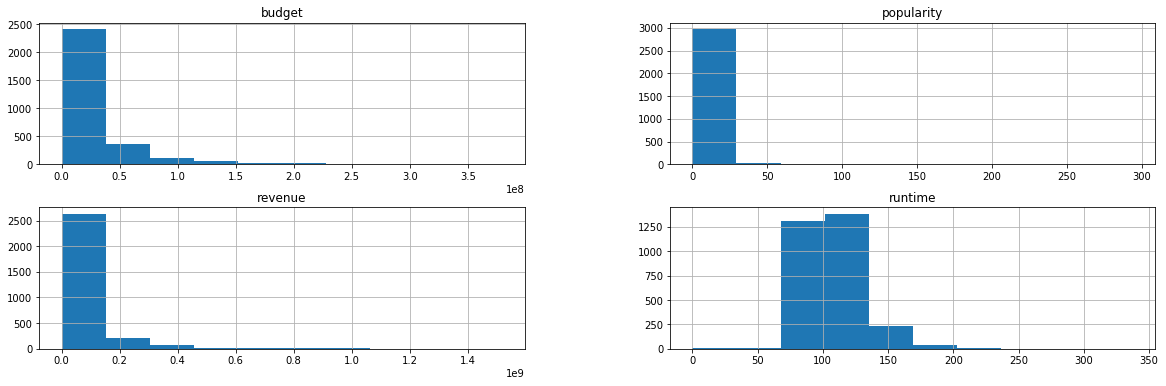

In [9]:
df.drop(columns='id').hist(figsize=(20,6))
plt.show()

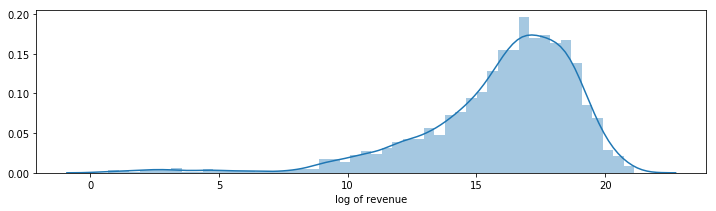

In [10]:
#distribution of log_revenue
plt.figure(figsize=(12,3))
sns.distplot(np.log1p(df['revenue']),bins=50,axlabel='log of revenue')
#The distribution is left skewed

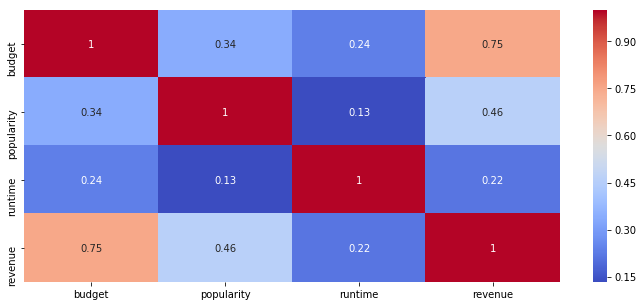

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(df.drop(columns=['id']).corr(),cmap='coolwarm',annot=True)

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


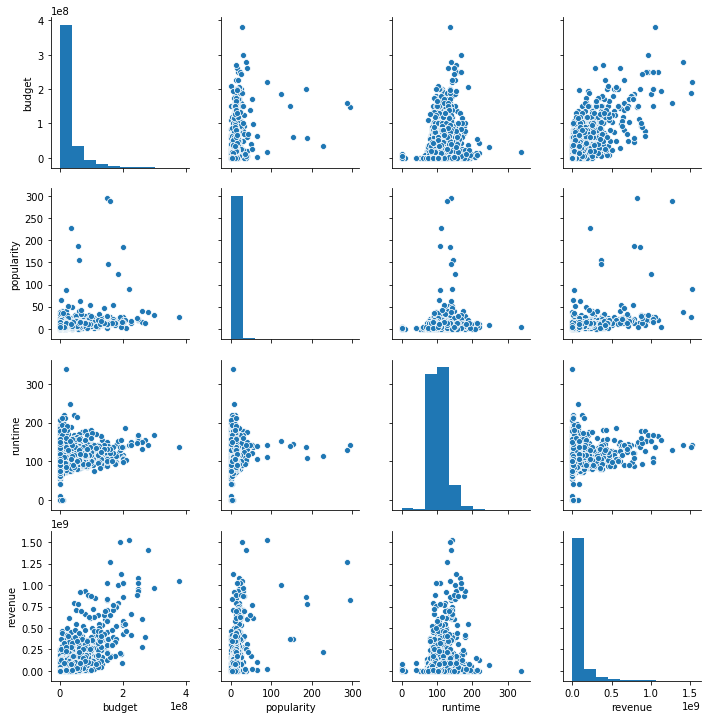

In [12]:
sns.pairplot(df.drop(columns=['id']))

## EDA BY FEATURES

#### BELONGS TO COLLECTION

In [13]:
#2396 out of 3000  does not belong to a collection. movies in collections might generate higher revenue, let's create a new feature
df['has_collection'] = df['belongs_to_collection'].apply(len)

In [14]:
df['has_collection'].head()

0    1
1    1
2    0
3    0
4    0
Name: has_collection, dtype: int64

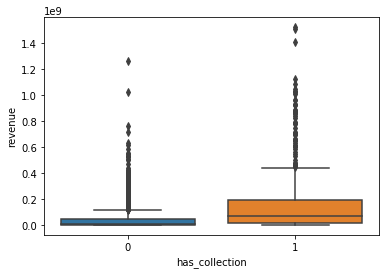

In [15]:
#it aligns with our assumption that has_collection movies generate higher revenue than no_collection movies
sns.boxplot(x='has_collection',y='revenue',data=df)

#### HOMEPAGE

In [16]:
df['homepage'].fillna('abc',inplace=True)
df['has_homepage'] = df['homepage'].apply(lambda x:1 if x !='abc' else 0)

In [17]:
df['has_homepage'].head()

0    0
1    0
2    1
3    1
4    0
Name: has_homepage, dtype: int64

#### POPULARITY

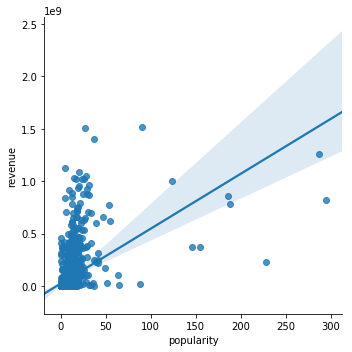

In [18]:
sns.lmplot(x='popularity',y='revenue',data=df)

#### ORINIGAL LANGUAGE

In [19]:
#freq count
df.groupby('original_language').count().sort_values(by='id',ascending=False)['id'].head(10)

original_language
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
Name: id, dtype: int64

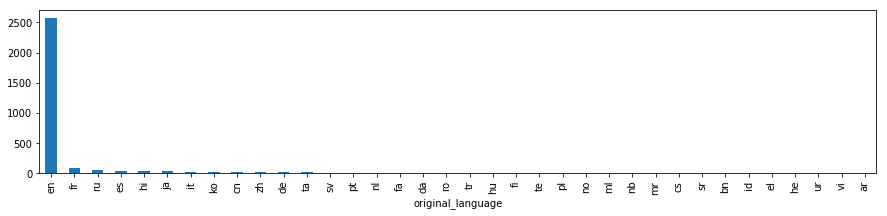

In [20]:
#num of movies in each original_language
df.groupby('original_language').count().sort_values(by='id',ascending=False)['id'].plot(kind='bar',figsize=(15,3))                                                                 

In [21]:
#sort by mean revenue 
df.groupby('original_language').mean()['revenue'].sort_values(ascending=False).head(10)

original_language
en    7.466591e+07
zh    7.037637e+07
tr    5.166341e+07
ja    3.065180e+07
cn    2.977289e+07
hi    2.534637e+07
de    2.053090e+07
fr    1.713257e+07
it    1.641513e+07
pl    1.501083e+07
Name: revenue, dtype: float64

In [22]:
#log transformation
df['log_revenue'] = np.log1p(df['revenue'])

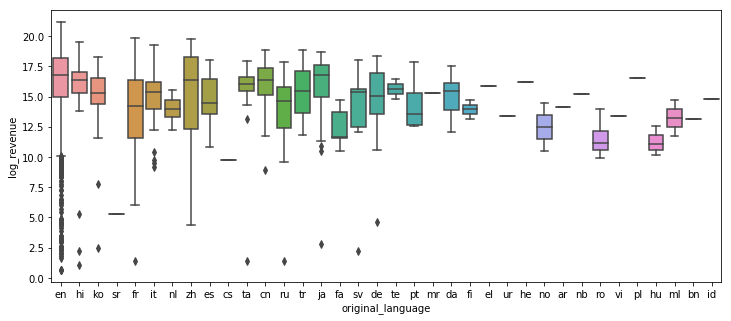

In [23]:
#sort by mean log_revenue 
plt.figure(figsize=(12,5))
sns.boxplot(x='original_language',y='log_revenue',data=df)

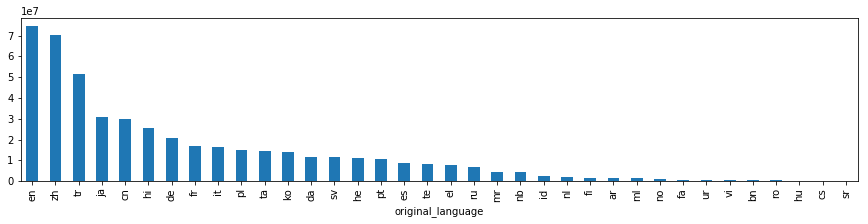

In [24]:
#sort by mean revenue 
df.groupby('original_language').mean()['revenue'].sort_values(ascending=False).plot(kind='bar',figsize=(15,3))

In [25]:
#create new features for original_language(top counts and top mean revenue)
list_of_original = ['en','zh','tr','ja','cn','hi','de','fr','it','pl','ru','es','ko']
for item in list_of_original:
    df[item] = 0
for item in list_of_original:
    for i in range(len(df)):
        if item in df.loc[i,'original_language']:
            df.loc[i,item] = 1
        else:
            df.loc[i,item] = 0

In [26]:
df[list_of_original].head()

,en,zh,tr,ja,cn,hi,de,fr,it,pl,ru,es,ko
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
#correlation between list_of_original and revenue
df[['revenue']+list_of_original].corr()['revenue'].sort_values(ascending=False)
#ja+cn+hi+de+ja+ko+it+hi+es+ru+fr  --> absolute value > 2%

revenue    1.000000
en         0.142130
zh         0.002119
tr        -0.003466
pl        -0.009714
cn        -0.022015
de        -0.026100
ja        -0.029316
ko        -0.031545
it        -0.032856
hi        -0.035857
es        -0.051005
ru        -0.054861
fr        -0.058925
Name: revenue, dtype: float64

#### SPOKEN LANGUAGES

In [28]:
#create new feature --> calculate num of spoken languages for each movie
df['num_spoken_langs'] = df['spoken_languages'].apply(len)

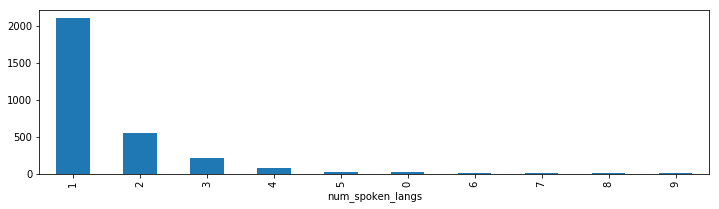

In [29]:
df.groupby('num_spoken_langs').count().sort_values(by='id',ascending=False)['id'].plot(kind='bar',figsize=(12,3))

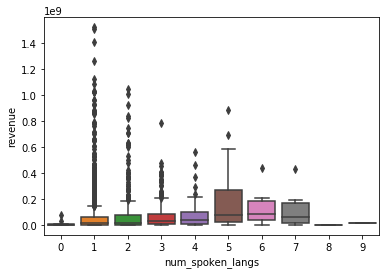

In [30]:
##### plt.figure(figsize=(12,5))
sns.boxplot(x='num_spoken_langs',y='revenue',data=df)

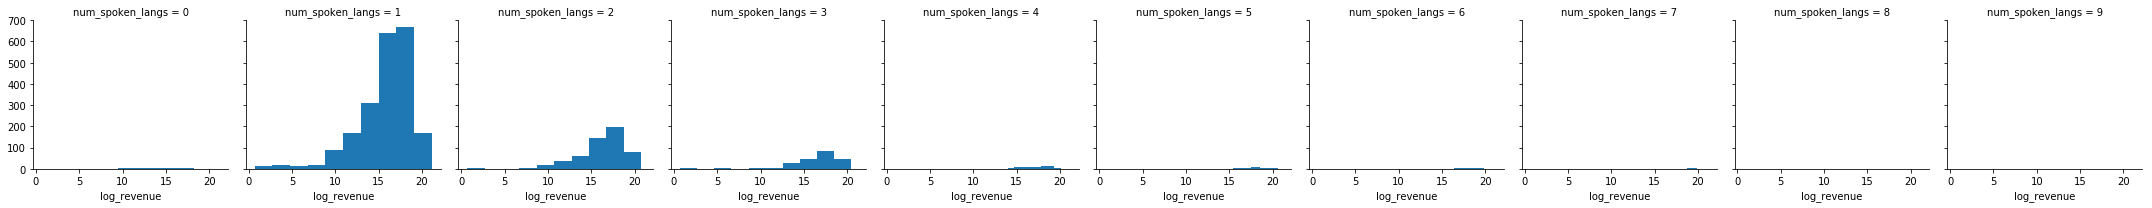

In [31]:
g = sns.FacetGrid(df,col='num_spoken_langs')
g.map(plt.hist,'log_revenue')

#### GENRES

In [32]:
#create new feature 
df['num_genres']= df['genres'].apply(len)

In [33]:
df.groupby('num_genres').count()['id']

num_genres
0      7
1    593
2    972
3    900
4    393
5    111
6     21
7      3
Name: id, dtype: int64

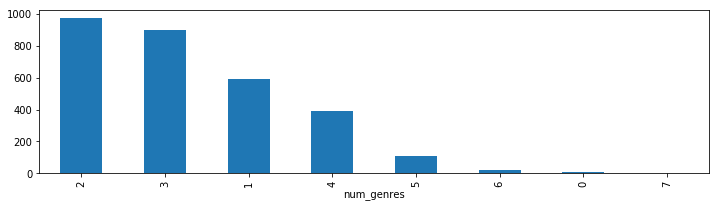

In [34]:
df.groupby('num_genres').count().sort_values(by='id',ascending=False)['id'].plot(kind='bar',figsize=(12,3))

In [35]:
df.groupby('num_genres').mean()['revenue']

num_genres
0    1.110844e+06
1    3.966845e+07
2    4.475659e+07
3    8.888497e+07
4    1.066105e+08
5    8.258928e+07
6    9.233659e+07
7    4.736216e+07
Name: revenue, dtype: float64

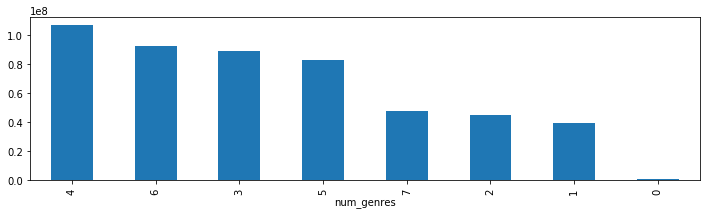

In [36]:
#compare revenue by num_genres
df.groupby('num_genres').mean().sort_values(by='revenue',ascending=False)['revenue'].plot(kind='bar',figsize=(12,3))

In [37]:
#extract genres for each movie and replace space with underscore
genres = list(df['genres'].apply(lambda x: ['_'.join(i['name'].split(' ')) for i in x ] if x != {} else [] ))

from collections import Counter
count = Counter([i for item in genres for i in item]).most_common()

#create a list of genres
list_of_genres = []
for i in range (0,20):
    list_of_genres.append(count[i][0])

#create columns for genres
for item in list_of_genres:
    df[item] = 0
for item in list_of_genres:
    for i in range(len(df)):
        if item in genres[i]:
            df.loc[i,item] = 1
        else:
            df.loc[i,item] = 0

In [38]:
df[list_of_genres].head()

,Drama,Comedy,Thriller,Action,Romance,Crime,Adventure,Horror,Science_Fiction,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV_Movie
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df[['revenue']+list_of_genres].corr()['revenue'].sort_values(ascending=False)

revenue            1.000000
Adventure          0.328439
Action             0.184584
Fantasy            0.171040
Family             0.161677
Science_Fiction    0.132367
Animation          0.130828
Thriller           0.006998
TV_Movie          -0.003283
Western           -0.013466
Mystery           -0.014686
Crime             -0.022648
War               -0.022701
Comedy            -0.030717
Music             -0.032214
Horror            -0.034041
History           -0.044172
Foreign           -0.048191
Romance           -0.049436
Documentary       -0.078030
Drama             -0.158280
Name: revenue, dtype: float64

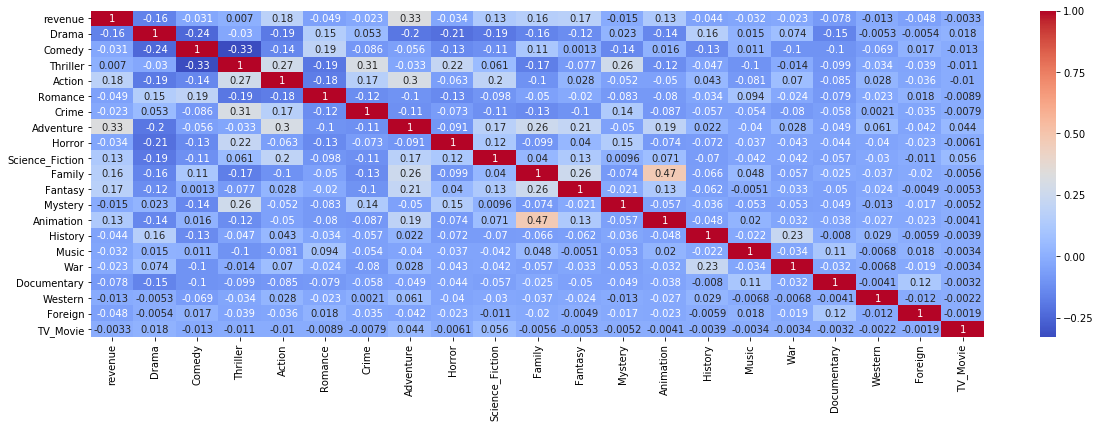

In [40]:
plt.figure(figsize=(20,6))
sns.heatmap(df[['revenue']+list_of_genres].corr(),cmap='coolwarm',annot=True)

In [41]:
#prepare for ols model
text = '+'.join(item for item in list_of_genres)
text

'Drama+Comedy+Thriller+Action+Romance+Crime+Adventure+Horror+Science_Fiction+Family+Fantasy+Mystery+Animation+History+Music+War+Documentary+Western+Foreign+TV_Movie'

#### KEYWORDS

In [42]:
#create features for keywords column
keyword = list(df['Keywords'].apply(lambda x: ['_'.join(i['name'].split(' ')) for i in x] if x != {} else []))
Counter([i for item in keyword for i in item]).most_common(20)
list_of_keyword = []
for i in range (0,20):
    item = Counter([i for item in keyword for i in item]).most_common(20)[i][0]
    list_of_keyword.append(item)
for item in list_of_keyword:
    df[item] = 0
for item in list_of_keyword:
    for i in range(len(df)):
        if item in keyword[i]:
            df.loc[i,item] = 1
        else:
            df.loc[i,item] = 0

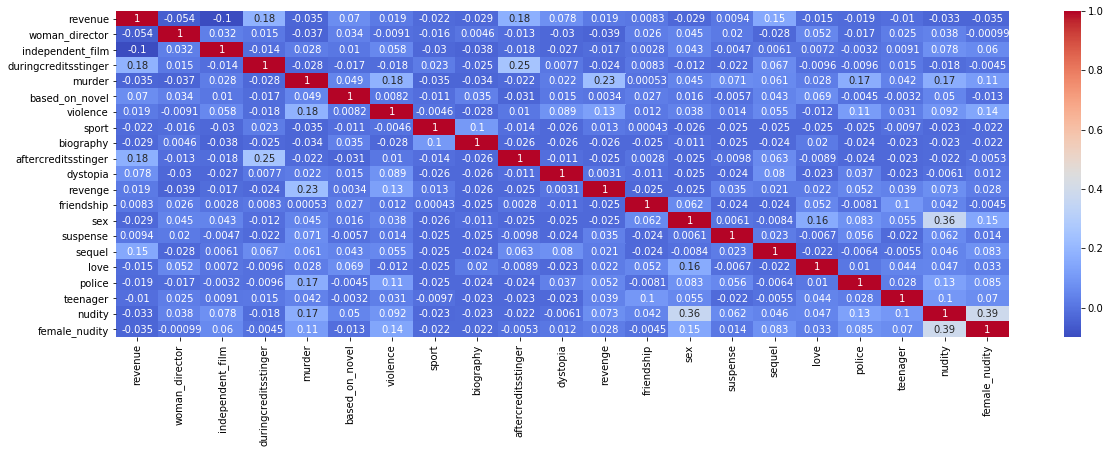

In [43]:
plt.figure(figsize=(20,6))
sns.heatmap(df[['revenue']+list_of_keyword].corr(),cmap='coolwarm',annot=True)

In [44]:
#prepare for ols model
text = '+'.join(item for item in list_of_keyword)
text

'woman_director+independent_film+duringcreditsstinger+murder+based_on_novel+violence+sport+biography+aftercreditsstinger+dystopia+revenge+friendship+sex+suspense+sequel+love+police+teenager+nudity+female_nudity'

#### CAST

In [45]:
df['num_of_cast'] = df['cast'].apply(len)
df['num_of_cast'].head()

0    24
1    20
2    51
3     7
4     4
Name: num_of_cast, dtype: int64

In [46]:
data_set_cast = pd.DataFrame(df, copy=True, columns=['id', 'revenue', 'cast'])
data_set_cast.head(10)

,id,revenue,cast
0,1,12314651,"[{'cast_id': 4, 'character': 'Lou', 'credit_id..."
1,2,95149435,"[{'cast_id': 1, 'character': 'Mia Thermopolis'..."
2,3,13092000,"[{'cast_id': 5, 'character': 'Andrew Neimann',..."
3,4,16000000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '..."
4,5,3923970,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred..."
5,6,3261638,"[{'cast_id': 6, 'character': 'Pinocchio (voice..."
6,7,85446075,"[{'cast_id': 23, 'character': 'Clyde', 'credit..."
7,8,2586511,"[{'cast_id': 2, 'character': 'Himself', 'credi..."
8,9,34327391,"[{'cast_id': 1, 'character': 'Long John Silver..."
9,10,18750246,"[{'cast_id': 24, 'character': 'Jonathan Steinb..."


In [47]:
rank = 1
data_set_cast['rank'] = 0
for ind in data_set_cast.sort_values(by='revenue', ascending=True).index:
    data_set_cast['rank'][ind] = rank
    rank = rank + 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
data_set_cast.head()

,id,revenue,cast,rank
0,1,12314651,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",1359
1,2,95149435,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",2414
2,3,13092000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",1383
3,4,16000000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",1476
4,5,3923970,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",898


In [49]:
def extract_keyword(json_str, keyword):
    keyword_array = []
    js = json.loads(json_str)
    for j in js:
        for key, value in j.items():
            if key==keyword:
                keyword_array.append(value)
    return keyword_array

In [50]:
actors = {}
def get_all_actors():
    for ind in data_set_cast.index:
        try:
            cast = eval(str(data_set_cast['cast'][ind]))
            cast = json.dumps(cast)
            # cast = cast.replace('\'', '"')
            # cast = cast.replace('None', '"None"')
            keyword_array = extract_keyword(cast, 'name')
            for keyword in keyword_array:
                rank = int(data_set_cast['rank'][ind])
                if not keyword in actors.keys():
                    actors[keyword] = rank
                else:
                    old_rank = actors[keyword]
                    actors[keyword] = old_rank + rank
        except Exception as ex:
            print(f'Extract failed for {ind} - {ex}')

In [51]:
get_all_actors()

In [52]:
actors['Rob Corddry']

9352

In [53]:
data_set_cast['cast_rank'] = 0
def get_cast_rank():
    for ind in data_set_cast.index:
        try:
            cast = eval(str(data_set_cast['cast'][ind]))
            cast = json.dumps(cast)
            keyword_array = extract_keyword(cast, 'name')
            cast_rank = 0
            for keyword in keyword_array:
                cast_rank = cast_rank + actors[keyword]
            data_set_cast['cast_rank'][ind] = cast_rank
        except Exception as ex:
            print(f'Extract failed for {ind} - {str(ex)}')

In [54]:
get_cast_rank()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [55]:
data_set_cast.head()

,id,revenue,cast,rank,cast_rank
0,1,12314651,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",1359,164851
1,2,95149435,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",2414,203750
2,3,13092000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",1383,179193
3,4,16000000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",1476,14574
4,5,3923970,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",898,3654


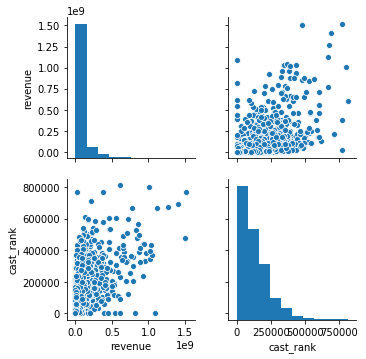

In [56]:
# Plotting data with no transformations
data_set_castr = pd.DataFrame(data_set_cast, copy=True, columns=['revenue', 'cast_rank'])
data_set_castr['revenue'] = data_set_castr['revenue']
data_set_castr['cast_rank'] = data_set_castr['cast_rank']
sns.pairplot(data_set_castr)

In [57]:
m = sm.ols('revenue ~ cast_rank', data = data_set_castr)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1338.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          1.74e-242
Time:                        01:31:38   Log-Likelihood:                -59921.
No. Observations:                3000   AIC:                         1.198e+05
Df Residuals:                    2998   BIC:                         1.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.061e+07   3.17e+06     -6.497      0.000   -2.68e+07   -1.44e+07
cast_rank    682.0893     18.649     36.574      0.000     645.522     718.656
==============================================================================
Omnibus:                     2470.225   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75966.578
Skew:                           3.759   Prob(JB):                         0.00
Kurtosis:                      26.478   Cond. No.                     2.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CREW

In [58]:
data_set_crew = pd.DataFrame(df, copy=True, columns=['id', 'revenue', 'crew'])
data_set_crew.head(10)

,id,revenue,crew
0,1,12314651,"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,95149435,"[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,13092000,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,16000000,"[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,3923970,"[{'credit_id': '52fe464b9251416c75073b43', 'de..."
5,6,3261638,"[{'credit_id': '52fe46f49251416c9106558b', 'de..."
6,7,85446075,"[{'credit_id': '52fe4981c3a368484e12ee29', 'de..."
7,8,2586511,"[{'credit_id': '52fe47a69251416c750a0daf', 'de..."
8,9,34327391,"[{'credit_id': '52fe43c89251416c7501deb3', 'de..."
9,10,18750246,"[{'credit_id': '52fe45609251416c750545b3', 'de..."


In [59]:
# Just copy ranks from previous dataframe
data_set_crew['rank'] = data_set_cast['rank']

In [60]:
data_set_crew.head()

,id,revenue,crew,rank
0,1,12314651,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",1359
1,2,95149435,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",2414
2,3,13092000,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1383
3,4,16000000,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1476
4,5,3923970,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",898


In [61]:
crew_member = {}
def get_all_crew():
    for ind in data_set_crew.index:
        try:
            crew = eval(str(data_set_crew['crew'][ind]))
            crew = json.dumps(crew)
            # cast = cast.replace('\'', '"')
            # cast = cast.replace('None', '"None"')
            keyword_array = extract_keyword(crew, 'name')
            for keyword in keyword_array:
                rank = int(data_set_crew['rank'][ind])
                if not keyword in crew_member.keys():
                    crew_member[keyword] = rank
                else:
                    old_rank = crew_member[keyword]
                    crew_member[keyword] = old_rank + rank
        except Exception as ex:
            print(f'Extract failed for {ind} - {ex}')

In [62]:
get_all_crew()

In [63]:
crew_member['Kelly Cantley']

1359

In [64]:
data_set_crew['crew_rank'] = 0
def get_crew_rank():
    for ind in data_set_crew.index:
        try:
            crew = eval(str(data_set_crew['crew'][ind]))
            crew = json.dumps(crew)
            keyword_array = extract_keyword(crew, 'name')
            crew_rank = 0
            for keyword in keyword_array:
                crew_rank = crew_rank + crew_member[keyword]
            data_set_crew['crew_rank'][ind] = crew_rank
        except Exception as ex:
            print(f'Extract failed for {ind} - {ex} - {crew}')

In [65]:
get_crew_rank()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [66]:
data_set_crew.head()

,id,revenue,crew,rank,crew_rank
0,1,12314651,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",1359,300860
1,2,95149435,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",2414,139523
2,3,13092000,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1383,395257
3,4,16000000,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1476,13284
4,5,3923970,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",898,3592


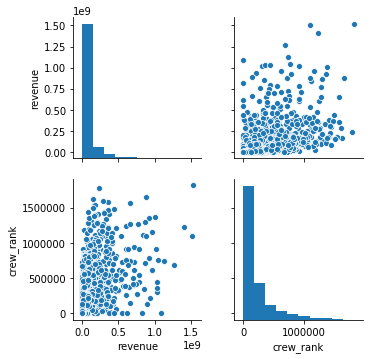

In [67]:
# Plotting data with no transformations
data_set_crewr = pd.DataFrame(data_set_crew, copy=True, columns=['revenue', 'crew_rank'])
data_set_crewr['revenue'] = data_set_crewr['revenue']
data_set_crewr['crew_rank'] = data_set_crewr['crew_rank']
sns.pairplot(data_set_crewr)

In [68]:
m = sm.ols('revenue ~ crew_rank', data = data_set_crewr)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     1177.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          6.26e-218
Time:                        01:36:49   Log-Likelihood:                -59978.
No. Observations:                3000   AIC:                         1.200e+05
Df Residuals:                    2998   BIC:                         1.200e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.175e+07   2.66e+06      4.410      0.000    6.52e+06     1.7e+07
crew_rank    265.5827      7.740     34.312      0.000     250.406     280.759
==============================================================================
Omnibus:                     2726.492   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107034.080
Skew:                           4.298   Prob(JB):                         0.00
Kurtosis:                      30.971   Cond. No.                     4.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### PRODUCTION COMPANIES

In [69]:
df['num_companies'] = df['production_companies'].apply(len)

In [70]:
df.groupby('num_companies').count()['id'].sort_values(ascending=False)

num_companies
1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
16      2
15      2
13      1
14      1
17      1
Name: id, dtype: int64

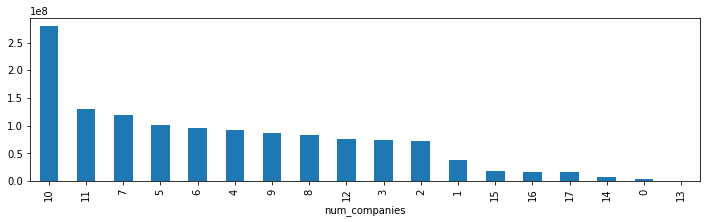

In [71]:
df.groupby('num_companies').mean()['revenue'].sort_values(ascending=False).plot(kind='bar',figsize=(12,3))

In [72]:
##Top 100 productive companies
companies = list(df['production_companies'].apply(lambda x: [('_'.join(i['name'].split(' '))).replace('.','').replace("''","") for i in x ] if x != {} else [] ))
count = Counter([i for item in companies for i in item]).most_common(100)
list_of_companies = []
for i in range (0,len(count)):
    list_of_companies.append(count[i][0])
for item in list_of_companies:
    df[item] = 0
for item in list_of_companies:
    for i in range(len(df)):
        if item in companies[i]:
            df.loc[i,item] = 1
        else:
            df.loc[i,item] = 0

In [73]:
list_of_companies[:30]

['Warner_Bros',
 'Universal_Pictures',
 'Paramount_Pictures',
 'Twentieth_Century_Fox_Film_Corporation',
 'Columbia_Pictures',
 'Metro-Goldwyn-Mayer_(MGM)',
 'New_Line_Cinema',
 'Touchstone_Pictures',
 'Walt_Disney_Pictures',
 'Columbia_Pictures_Corporation',
 'TriStar_Pictures',
 'Relativity_Media',
 'Canal+',
 'United_Artists',
 'Miramax_Films',
 'Village_Roadshow_Pictures',
 'Regency_Enterprises',
 'BBC_Films',
 'Dune_Entertainment',
 'Working_Title_Films',
 'Fox_Searchlight_Pictures',
 'StudioCanal',
 'Lionsgate',
 'DreamWorks_SKG',
 'Fox_2000_Pictures',
 'Summit_Entertainment',
 'Hollywood_Pictures',
 'Orion_Pictures',
 'Amblin_Entertainment',
 'Dimension_Films']

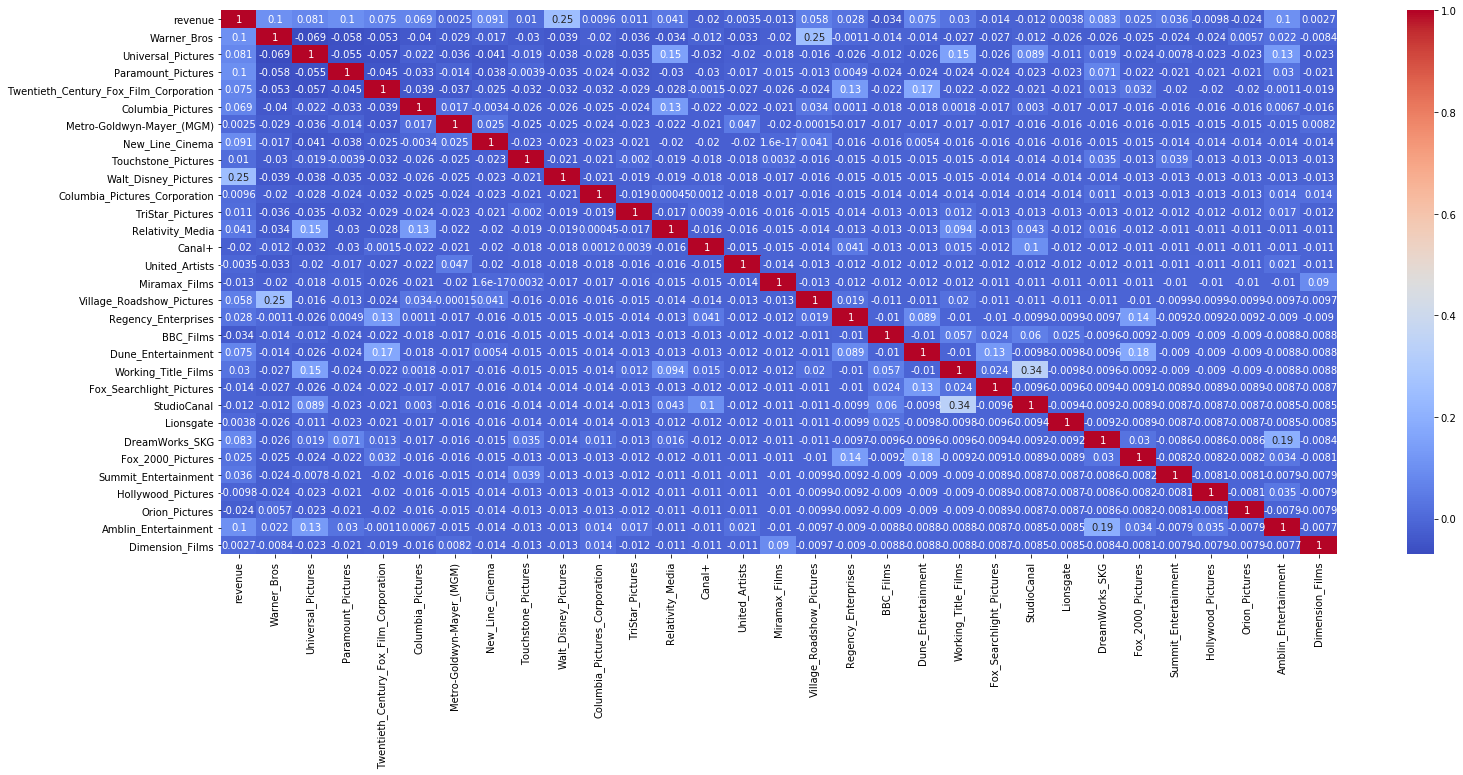

In [74]:
plt.figure(figsize=(25,10))
sns.heatmap(df[['revenue']+list_of_companies[:30]].corr(),cmap='coolwarm',annot=True)

In [75]:
df[['revenue']+list_of_companies].corr()['revenue'].sort_values(ascending=False)

revenue                                   1.000000
Walt_Disney_Pictures                      0.250426
WingNut_Films                             0.196456
Pixar_Animation_Studios                   0.175093
Legendary_Pictures                        0.168856
Blue_Sky_Studios                          0.147224
Di_Bonaventura_Pictures                   0.142978
Twentieth_Century_Fox_Animation           0.140188
TSG_Entertainment                         0.119442
Eon_Productions                           0.105968
Amblin_Entertainment                      0.104865
Warner_Bros                               0.104750
Paramount_Pictures                        0.100544
Original_Film                             0.098430
Donners'_Company                          0.097980
Dentsu                                    0.094997
New_Line_Cinema                           0.091335
DreamWorks_SKG                            0.083430
Universal_Pictures                        0.080752
Twentieth_Century_Fox_Film_Corp

In [76]:
#prepare for ols model
text = '+'.join(item for item in list_of_companies)
text

"Warner_Bros+Universal_Pictures+Paramount_Pictures+Twentieth_Century_Fox_Film_Corporation+Columbia_Pictures+Metro-Goldwyn-Mayer_(MGM)+New_Line_Cinema+Touchstone_Pictures+Walt_Disney_Pictures+Columbia_Pictures_Corporation+TriStar_Pictures+Relativity_Media+Canal++United_Artists+Miramax_Films+Village_Roadshow_Pictures+Regency_Enterprises+BBC_Films+Dune_Entertainment+Working_Title_Films+Fox_Searchlight_Pictures+StudioCanal+Lionsgate+DreamWorks_SKG+Fox_2000_Pictures+Summit_Entertainment+Hollywood_Pictures+Orion_Pictures+Amblin_Entertainment+Dimension_Films+Castle_Rock_Entertainment+Epsilon_Motion_Pictures+Morgan_Creek_Productions+Original_Film+Focus_Features+Legendary_Pictures+Participant_Media+Blumhouse_Productions+New_Regency_Pictures+Film4+Spyglass_Entertainment+Imagine_Entertainment+Screen_Gems+Millennium_Films+TSG_Entertainment+Lakeshore_Entertainment+France_2_Cinéma+Silver_Pictures+The_Weinstein_Company+PolyGram_Filmed_Entertainment+Eon_Productions+Scott_Rudin_Productions+Dune_Enterta

---top 20 related production companies
Walt_Disney_Pictures+WingNut_Films+Pixar_Animation_Studios+Legendary_Pictures+Blue_Sky_Studios+Di_Bonaventura_Pictures +Twentieth_Century_Fox_Animation+TSG_Entertainment+Eon_Productions+Amblin_Entertainment+Warner_Bros+Paramount_Pictures+Original_Film+Dentsu+New_Line_Cinema+DreamWorks_SKG+Universal_Pictures+Twentieth_Century_Fox_Film_Corporation+Dune_Entertainment

#### PRODUCTION COUNTRIES

In [77]:
#this is highly related to production companies
df['num_countries']=df['production_countries'].apply(len)

In [78]:
df.groupby('num_countries').count()['id'].sort_values(ascending=False)

num_countries
1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: id, dtype: int64

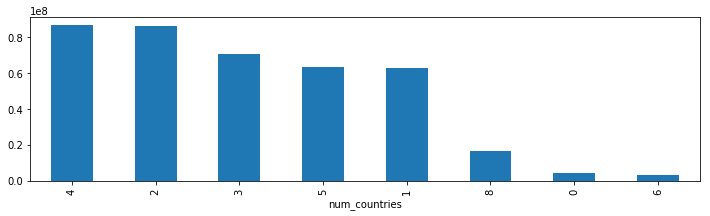

In [79]:
df.groupby('num_countries').mean()['revenue'].sort_values(ascending=False).plot(kind='bar',figsize=(12,3))

#### RELEASE DATE

In [80]:
def release_date(x):
    if int(x.split('/')[2]) <= 19:
        return x[:-2] + '20' + x.split('/')[2]
    else:
        return x[:-2] + '19'+ x.split('/')[2]
df['release_date'] = df['release_date'].apply(release_date)
df['release_date'] = pd.to_datetime(df['release_date'])

In [81]:
df['release_date'].head()

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_date, dtype: datetime64[ns]

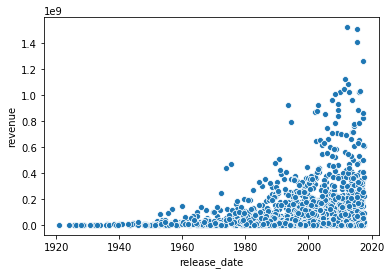

In [82]:
sns.scatterplot(x='release_date',y='revenue',data=df)

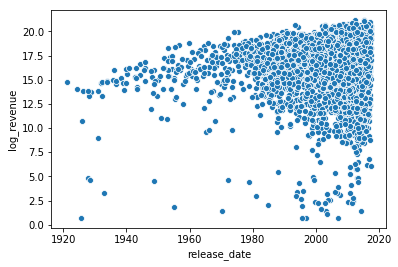

In [83]:
sns.scatterplot(x='release_date',y='log_revenue',data=df)

In [84]:
#extract seasonality from release_date
import datetime as dt
d = ['year', 'month', 'day', 'quarter', 'dayofweek', 'dayofyear', 'weekofyear']
for item in d:
    df[item] =  getattr(df['release_date'].dt, item)

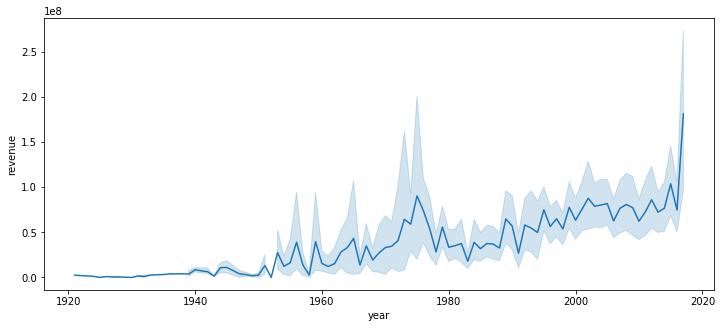

In [85]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='revenue',data=df)

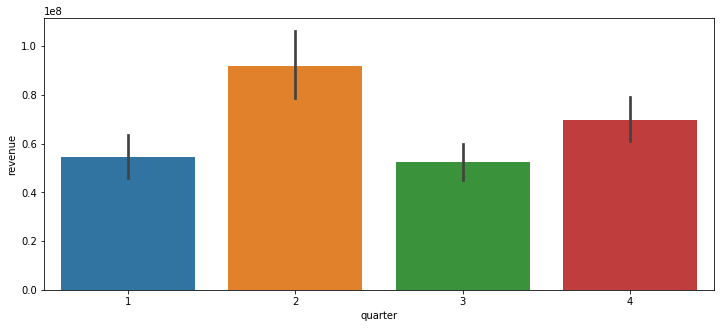

In [86]:
plt.figure(figsize=(12,5))
sns.barplot(x='quarter',y='revenue',data=df)

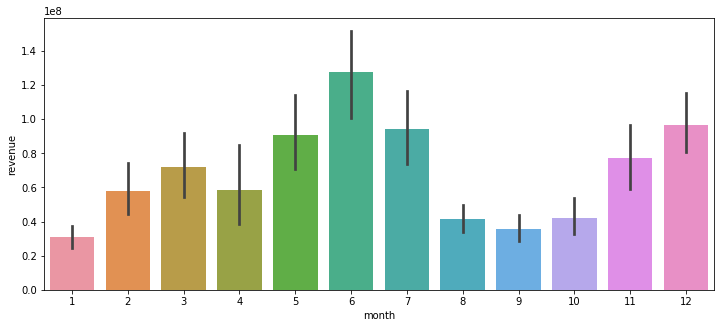

In [87]:
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='revenue',data=df)

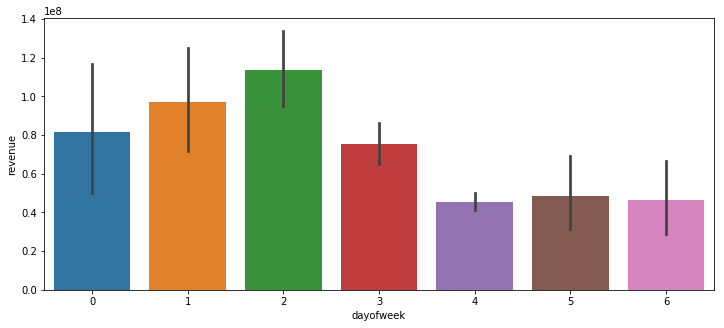

In [88]:
plt.figure(figsize=(12,5))
sns.barplot(x='dayofweek',y='revenue',data=df)

#### STATUS

In [89]:
#released movies has a much higher revenue than rumored 
#create a new feature 
df['released'] = df['status'].apply(lambda x : 1 if x =='Released' else 0)

In [90]:
df.groupby('status').mean()['revenue'].sort_values(ascending=False)

status
Released    6.681029e+07
Rumored     3.480199e+06
Name: revenue, dtype: float64

#### TRANSFORMATION

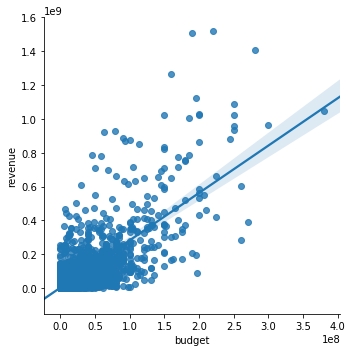

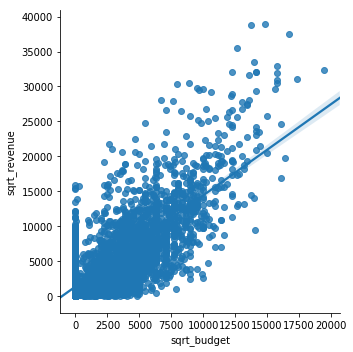

In [91]:
y = df['revenue']
df['sqrt_revenue'] = np.sqrt(df['revenue'])
df['sqrt_budget'] = np.sqrt(df['budget'])
df['sqrt2_revenue'] = np.sqrt(df['sqrt_revenue'])
df['sqrt2_budget'] = np.sqrt(df['sqrt_budget'])
sns.lmplot(x='budget',y='revenue',data=df)
sns.lmplot(x='sqrt_budget',y='sqrt_revenue',data=df)

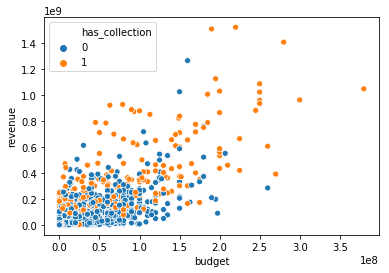

In [92]:
sns.scatterplot(x='budget',y='revenue',hue='has_collection',data=df)

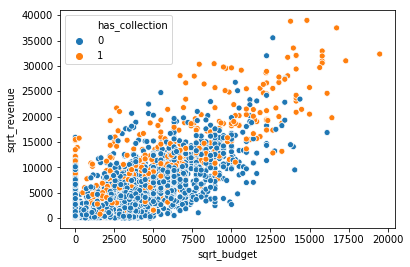

In [93]:
#this appears to be relatively more linear than revenue vs. budget
sns.scatterplot(x='sqrt_budget',y='sqrt_revenue',hue='has_collection',data=df)

## Modelling

### Linear Regression - OLS

In [94]:
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import rmse

In [95]:
m = sm.ols('revenue ~ budget', data = df)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3925.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:09   Log-Likelihood:                -59219.
No. Observations:                3000   AIC:                         1.184e+05
Df Residuals:                    2998   BIC:                         1.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.709e+06   1.93e+06      1.917      0.055   -8.47e+04     7.5e+06
budget         2.7969      0.045     62.650      0.000       2.709       2.884
==============================================================================
Omnibus:                     2148.524   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68600.148
Skew:                           3.006   Prob(JB):                         0.00
Kurtosis:                      25.642   Cond. No.                     5.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
preds = m.predict()
rmse(y,preds)

90489592.217771

In [97]:
m = sm.ols('revenue ~ budget+popularity', data = df)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2383.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:09   Log-Likelihood:                -59047.
No. Observations:                3000   AIC:                         1.181e+05
Df Residuals:                    2997   BIC:                         1.181e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.187e+07      2e+06     -5.932      0.000   -1.58e+07   -7.94e+06
budget         2.5035      0.045     55.795      0.000       2.415       2.591
popularity  2.622e+06   1.37e+05     19.100      0.000    2.35e+06    2.89e+06
==============================================================================
Omnibus:                     2051.549   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64029.841
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      24.924   Cond. No.                     5.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
preds = m.predict()
rmse(y,preds)

85438779.04357642

In [99]:
#it's supposed to generate 2 slopes, need to fix this 
m = sm.ols('revenue ~ budget+ release_date', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     4.478
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           9.42e-88
Time:                        01:40:28   Log-Likelihood:                -56068.
No. Observations:                3000   AIC:                         1.169e+05
Df Residuals:                     601   BIC:                         1.313e+05
Df Model:                        2398                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         1.957e+06   7.07e+07      0.028      0.978   -1.37e+08    1.41e+08
release_date[T.Timestamp('1924-03-18 00:00:00')]  -3.21e+06      1e+08     -0.032      0.974      -2e+08    1.93e+08
release_date[T.Timestamp('1925-08-26 00:00:00')] -1.958e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1925-12-24 00:00:00')] -1.912e+06      1e+08     -0.019      0.985   -1.98e+08    1.95e+08
release_date[T.Timestamp('1926-05-14 00:00:00')] -1.997e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1927-09-23 00:00:00')] -1.957e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1927-10-31 00:00:00')] -1.979e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1928-04-07 00:00:00')] -1.991e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1928-06-16 00:00:00')] -1.957e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1928-11-24 00:00:00')] -1.599e+06      1e+08     -0.016      0.987   -1.98e+08    1.95e+08
release_date[T.Timestamp('1930-10-28 00:00:00')] -1.949e+06      1e+08     -0.019      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1931-02-12 00:00:00')] -1.716e+06      1e+08     -0.017      0.986   -1.98e+08    1.95e+08
release_date[T.Timestamp('1931-12-26 00:00:00')] -9.422e+05      1e+08     -0.009      0.992   -1.97e+08    1.96e+08
release_date[T.Timestamp('1932-04-09 00:00:00')] -1.357e+06      1e+08     -0.014      0.989   -1.98e+08    1.95e+08
release_date[T.Timestamp('1932-05-25 00:00:00')] -8.836e+05      1e+08     -0.009      0.993   -1.97e+08    1.96e+08
release_date[T.Timestamp('1932-12-08 00:00:00')] -1.957e+06      1e+08     -0.020      0.984   -1.98e+08    1.94e+08
release_date[T.Timestamp('1933-10-06 00:00:00')]  4.043e+05      1e+08      0.004      0.997   -1.96e+08    1.97e+08
release_date[T.Timestamp('1933-12-26 00:00:00')] -1.767e+06      1e+08     -0.018      0.986   -1.98e+08    1.95e+08
release_date[T.Timestamp('1935-09-06 00:00:00')] -7.795e+04      1e+08     -0.001      0.999   -1.97e+08    1.96e+08
release_date[T.Timestamp('1936-02-05 00:00:00')]  6.543e+06      1e+08      0.065      0.948    -1.9e+08    2.03e+08
release_date[T.Timestamp('1936-08-27 00:00:00')] -1.282e+06      1e+08     -0.013      0.990   -1.98e+08    1.95e+08
release_date[T.Timestamp('1936-08-28 00:00:00')] -2.369e+06      1e+08     -0.024      0.981   -1.99e+08    1.94e+08
release_date[T.Timestamp('1936-10-20 00:00:00')] -1.828e+06      1e+08     -0.018      0.985   -1.98e+08    1.95e+08
release_date[T.Timestamp('1938-05-24 00:0

In [100]:
#fitting more cols plus list_of_original_languages
m = sm.ols('revenue ~ budget+num_genres+released+has_homepage+num_companies+has_collection+runtime+num_spoken_langs+popularity+year+month+dayofweek+dayofyear+en', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     396.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:30   Log-Likelihood:                -58860.
No. Observations:                2998   AIC:                         1.177e+05
Df Residuals:                    2983   BIC:                         1.178e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.524e+08   2.31e+08      2.395      0.017       1e+08       1e+09
budget               2.3665      0.049     47.975      0.000       2.270       2.463
num_genres       -2.546e+06   1.38e+06     -1.839      0.066   -5.26e+06    1.69e+05
released         -1.256e+07   4.11e+07     -0.306      0.760   -9.31e+07     6.8e+07
has_homepage      2.333e+07   3.56e+06      6.557      0.000    1.64e+07    3.03e+07
num_companies    -3.218e+06   7.98e+05     -4.031      0.000   -4.78e+06   -1.65e+06
has_collection     5.57e+07   3.89e+06     14.302      0.000    4.81e+07    6.33e+07
runtime           2.712e+05   7.29e+04      3.722      0.000    1.28e+05    4.14e+05
num_spoken_langs  -3.58e+06   1.74e+06     -2.054      0.040      -7e+06   -1.63e+05
popularity        2.378e+06   1.33e+05     17.829      0.000    2.12e+06    2.64e+06
year             -2.782e+05   1.13e+05     -2.473      0.013   -4.99e+05   -5.76e+04
month            -7.292e+06   5.28e+06     -1.380      0.168   -1.76e+07    3.07e+06
dayofweek        -3.931e+06   1.16e+06     -3.387      0.001   -6.21e+06   -1.66e+06
dayofyear         2.443e+05   1.73e+05      1.411      0.158   -9.51e+04    5.84e+05
en               -2.271e+06   4.56e+06     -0.498      0.618   -1.12e+07    6.66e+06
==============================================================================
Omnibus:                     1984.839   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59720.400
Skew:                           2.687   Prob(JB):                         0.00
Kurtosis:                      24.194   Cond. No.                     6.72e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#removing month,dayofyear,list_of_original languages
#fitting genres
m = sm.ols('revenue ~budget+num_genres+has_homepage+num_companies+has_collection+runtime+num_spoken_langs+year+dayofweek+popularity+Drama+Comedy+Thriller+Action+Romance+Crime+Adventure+Horror+Family+Fantasy+Mystery+Animation+History+Music+War+Documentary+Western+Foreign', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     206.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:30   Log-Likelihood:                -58814.
No. Observations:                2998   AIC:                         1.177e+05
Df Residuals:                    2969   BIC:                         1.179e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.738e+08   2.22e+08      2.138      0.033    3.94e+07    9.08e+08
budget               2.3202      0.051     45.763      0.000       2.221       2.420
num_genres       -1.287e+07   5.36e+06     -2.402      0.016   -2.34e+07   -2.36e+06
has_homepage        2.2e+07   3.53e+06      6.223      0.000    1.51e+07    2.89e+07
num_companies     -2.69e+06   8.01e+05     -3.357      0.001   -4.26e+06   -1.12e+06
has_collection    5.593e+07   4.09e+06     13.690      0.000    4.79e+07    6.39e+07
runtime           3.973e+05   7.85e+04      5.059      0.000    2.43e+05    5.51e+05
num_spoken_langs -2.409e+06   1.73e+06     -1.390      0.165   -5.81e+06     9.9e+05
year             -2.565e+05   1.11e+05     -2.312      0.021   -4.74e+05    -3.9e+04
dayofweek        -4.033e+06   1.15e+06     -3.517      0.000   -6.28e+06   -1.78e+06
popularity        2.407e+06   1.32e+05     18.289      0.000    2.15e+06    2.67e+06
Drama             1.172e+07   6.16e+06      1.902      0.057    -3.6e+05    2.38e+07
Comedy            1.573e+07   6.14e+06      2.563      0.010     3.7e+06    2.78e+07
Thriller          8.725e+06   6.68e+06      1.306      0.191   -4.37e+06    2.18e+07
Action            3.338e+05   7.15e+06      0.047      0.963   -1.37e+07    1.44e+07
Romance            2.21e+07   6.63e+06      3.335      0.001    9.11e+06    3.51e+07
Crime              4.31e+06   6.52e+06      0.661      0.509   -8.47e+06    1.71e+07
Adventure         3.227e+07   7.44e+06      4.338      0.000    1.77e+07    4.69e+07
Horror            1.058e+07   7.98e+06      1.325      0.185   -5.07e+06    2.62e+07
Family            1.037e+07   8.22e+06      1.262      0.207   -5.75e+06    2.65e+07
Fantasy           1.146e+07   8.19e+06      1.398      0.162   -4.61e+06    2.75e+07
Mystery           7.846e+06   7.99e+06      0.981      0.326   -7.83e+06    2.35e+07
Animation         3.052e+07   9.88e+06      3.089      0.002    1.11e+07    4.99e+07
History          -1.059e+07   9.19e+06     -1.152      0.250   -2.86e+07    7.44e+06
Music             9.849e+06   9.84e+06      1.001      0.317   -9.45e+06    2.91e+07
War              -1.607e+07   9.89e+06     -1.624      0.104   -3.55e+07    3.33e+06
Documentary       1.576e+07   1.07e+07      1.468      0.142   -5.29e+06    3.68e+07
Western           7.386e+06   1.35e+07      0.546      0.585   -1.91e+07    3.39e+07
Foreign            2.36e+07   1.57e+07      1.501      0.133   -7.22e+06    5.44e+07
==============================================================================
Omnibus:                     1985.198   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61143.397
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      24.465   Cond. N

In [102]:
#fitting keywords, does not improve the performance
m = sm.ols('revenue ~budget+num_genres+released+has_homepage+num_companies+has_collection+runtime+num_spoken_langs+year+dayofweek+popularity+Drama+Comedy+Romance+Adventure+Animation+Documentary+Foreign+woman_director+independent_film+duringcreditsstinger+murder+based_on_novel+violence+sport+biography+aftercreditsstinger+dystopia+revenge+friendship+sex+suspense+sequel+love+police+teenager+nudity+female_nudity', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:30   Log-Likelihood:                -58803.
No. Observations:                2998   AIC:                         1.177e+05
Df Residuals:                    2959   BIC:                         1.179e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.625e+08   2.25e+08      2.052      0.040    2.05e+07    9.04e+08
budget                   2.3112      0.050     45.927      0.000       2.213       2.410
num_genres           -8.153e+06    1.6e+06     -5.100      0.000   -1.13e+07   -5.02e+06
released              1.453e+06   4.08e+07      0.036      0.972   -7.85e+07    8.14e+07
has_homepage           2.01e+07   3.57e+06      5.638      0.000    1.31e+07    2.71e+07
num_companies        -2.593e+06   8.03e+05     -3.229      0.001   -4.17e+06   -1.02e+06
has_collection        5.675e+07   4.16e+06     13.631      0.000    4.86e+07    6.49e+07
runtime               3.389e+05   7.65e+04      4.429      0.000    1.89e+05    4.89e+05
num_spoken_langs     -3.185e+06   1.72e+06     -1.851      0.064   -6.56e+06    1.88e+05
year                 -2.483e+05   1.11e+05     -2.243      0.025   -4.65e+05   -3.12e+04
dayofweek            -3.847e+06   1.14e+06     -3.360      0.001   -6.09e+06    -1.6e+06
popularity            2.395e+06   1.32e+05     18.141      0.000    2.14e+06    2.65e+06
Drama                 6.518e+06   3.64e+06      1.792      0.073   -6.12e+05    1.36e+07
Comedy                9.912e+06   3.53e+06      2.807      0.005    2.99e+06    1.68e+07
Romance               1.821e+07   4.13e+06      4.405      0.000    1.01e+07    2.63e+07
Adventure             2.517e+07   5.03e+06      5.002      0.000    1.53e+07     3.5e+07
Animation              2.94e+07   7.42e+06      3.960      0.000    1.48e+07     4.4e+07
Documentary           1.244e+07   9.52e+06      1.306      0.192   -6.24e+06    3.11e+07
Foreign               2.059e+07   1.48e+07      1.396      0.163   -8.33e+06    4.95e+07
woman_director       -5.525e+06   6.51e+06     -0.849      0.396   -1.83e+07    7.23e+06
independent_film     -6.858e+06   6.79e+06     -1.010      0.313   -2.02e+07    6.46e+06
duringcreditsstinger   3.64e+07   7.53e+06      4.834      0.000    2.16e+07    5.12e+07
murder               -5.999e+06      8e+06     -0.750      0.453   -2.17e+07    9.68e+06
based_on_novel        2.609e+06   7.92e+06      0.329      0.742   -1.29e+07    1.81e+07
violence              6.433e+06   9.16e+06      0.702      0.483   -1.15e+07    2.44e+07
sport                -1.014e+07   9.17e+06     -1.105      0.269   -2.81e+07    7.84e+06
biography            -5.311e+06   9.52e+06     -0.558      0.577    -2.4e+07    1.34e+07
aftercreditsstinger  -4.687e+06   9.93e+06     -0.472      0.637   -2.42e+07    1.48e+07
dystopia             -1.619e+07   9.82e+06     -1.649      0.099   -3.54e+07    3.06e+06
revenge               9.364e+06   9.93e+06      0.943      0.346   -1.01e+07    2.88e+07
friendship            1.337e+07   9.73e+06      1.374      0.170   -5.72e+06    3.25e+07
sex                   1.208e+07   1.07e+07      1.131    

In [103]:
#fitting production companies
m = sm.ols('revenue ~budget+num_genres+has_homepage+num_companies+has_collection+runtime+year+dayofweek+popularity+Romance+Adventure+Documentary+Drama+Animation+War+duringcreditsstinger+Walt_Disney_Pictures+WingNut_Films+Pixar_Animation_Studios+Legendary_Pictures+Blue_Sky_Studios+Di_Bonaventura_Pictures +Twentieth_Century_Fox_Animation+TSG_Entertainment+Eon_Productions+Amblin_Entertainment+Warner_Bros+Paramount_Pictures+Original_Film+Dentsu+New_Line_Cinema+DreamWorks_SKG+Universal_Pictures+Twentieth_Century_Fox_Film_Corporation+Dune_Entertainment', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     181.2
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:31   Log-Likelihood:                -58719.
No. Observations:                2998   AIC:                         1.175e+05
Df Residuals:                    2962   BIC:                         1.177e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               3.956e+08   2.19e+08      1.807      0.071   -3.36e+07    8.25e+08
budget                                     2.1099      0.054     39.393      0.000       2.005       2.215
num_genres                             -5.984e+06   1.51e+06     -3.954      0.000   -8.95e+06   -3.02e+06
has_homepage                            1.729e+07   3.48e+06      4.966      0.000    1.05e+07    2.41e+07
num_companies                           -3.09e+06   7.83e+05     -3.945      0.000   -4.63e+06   -1.55e+06
has_collection                          5.237e+07   3.92e+06     13.354      0.000    4.47e+07    6.01e+07
runtime                                 2.906e+05   7.31e+04      3.975      0.000    1.47e+05    4.34e+05
year                                   -2.122e+05    1.1e+05     -1.938      0.053   -4.27e+05    2547.249
dayofweek                               -3.56e+06   1.12e+06     -3.191      0.001   -5.75e+06   -1.37e+06
popularity                              2.382e+06    1.3e+05     18.365      0.000    2.13e+06    2.64e+06
Romance                                 1.947e+07   3.85e+06      5.052      0.000    1.19e+07     2.7e+07
Adventure                               1.773e+07   4.92e+06      3.603      0.000    8.08e+06    2.74e+07
Documentary                             5.781e+06   8.89e+06      0.650      0.515   -1.16e+07    2.32e+07
Drama                                   4.393e+06   3.33e+06      1.319      0.187   -2.14e+06    1.09e+07
Animation                               9.353e+06   7.62e+06      1.228      0.220   -5.58e+06    2.43e+07
War                                    -2.827e+07   8.16e+06     -3.466      0.001   -4.43e+07   -1.23e+07
duringcreditsstinger                    3.697e+07   7.19e+06      5.140      0.000    2.29e+07    5.11e+07
Walt_Disney_Pictures                    4.133e+07   1.13e+07      3.666      0.000    1.92e+07    6.34e+07
WingNut_Films                           1.976e+08    2.7e+07      7.317      0.000    1.45e+08    2.51e+08
Pixar_Animation_Studios                 9.886e+07   2.99e+07      3.309      0.001    4.03e+07    1.57e+08
Legendary_Pictures                      2.658e+07   1.89e+07      1.405      0.160   -1.05e+07    6.37e+07
Blue_Sky_Studios                        2.492e+08   8.32e+07      2.996      0.003    8.61e+07    4.12e+08
Di_Bonaventura_Pictures                 6.691e+07   2.73e+07      2.455      0.014    1.35e+07     1.2e+08
Twentieth_Century_Fox_Animation        -3.632e+07   7.89e+07     -0.460      0.645   -1.91e+08    1.18e+08
TSG_Entertainment                       4.684e+07   2.04e+07      2.298      0.022    6.87e+06    8.68e+07
Eon_Productions                         3.782e+07   2.18e+07      1.737      0.083   -4

In [104]:
#fitting CAST and CREW
df['cast_rank'] = data_set_cast['cast_rank']
df['crew_rank'] = data_set_crew['crew_rank']
m = sm.ols('revenue ~budget+num_genres+cast_rank+crew_rank+has_homepage+num_companies+has_collection+runtime+year+dayofweek+popularity+Romance+Adventure+Documentary+Drama+Animation+War+duringcreditsstinger+Walt_Disney_Pictures+WingNut_Films+Pixar_Animation_Studios+Legendary_Pictures+Blue_Sky_Studios+Di_Bonaventura_Pictures +Twentieth_Century_Fox_Animation+TSG_Entertainment+Eon_Productions+Amblin_Entertainment+Warner_Bros+Paramount_Pictures+Original_Film+Dentsu+New_Line_Cinema+DreamWorks_SKG+Universal_Pictures+Twentieth_Century_Fox_Film_Corporation+Dune_Entertainment', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:31   Log-Likelihood:                -58676.
No. Observations:                2998   AIC:                         1.174e+05
Df Residuals:                    2960   BIC:                         1.177e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               4.376e+08   2.16e+08      2.027      0.043    1.42e+07    8.61e+08
budget                                     1.8678      0.060     31.272      0.000       1.751       1.985
num_genres                             -6.802e+06    1.5e+06     -4.543      0.000   -9.74e+06   -3.87e+06
cast_rank                                126.3729     17.970      7.032      0.000      91.138     161.608
crew_rank                                 21.5879      7.462      2.893      0.004       6.956      36.220
has_homepage                            1.532e+07   3.44e+06      4.453      0.000    8.57e+06    2.21e+07
num_companies                          -3.725e+06   7.79e+05     -4.783      0.000   -5.25e+06    -2.2e+06
has_collection                          5.249e+07   3.87e+06     13.564      0.000    4.49e+07    6.01e+07
runtime                                 2.216e+05   7.25e+04      3.056      0.002    7.94e+04    3.64e+05
year                                   -2.335e+05   1.08e+05     -2.161      0.031   -4.45e+05   -2.16e+04
dayofweek                              -3.783e+06    1.1e+06     -3.439      0.001   -5.94e+06   -1.63e+06
popularity                              2.177e+06    1.3e+05     16.772      0.000    1.92e+06    2.43e+06
Romance                                 2.091e+07   3.81e+06      5.491      0.000    1.34e+07    2.84e+07
Adventure                               2.092e+07   4.87e+06      4.298      0.000    1.14e+07    3.05e+07
Documentary                             1.602e+07   8.84e+06      1.813      0.070   -1.31e+06    3.33e+07
Drama                                   4.765e+06   3.29e+06      1.449      0.147   -1.68e+06    1.12e+07
Animation                               1.349e+07   7.54e+06      1.790      0.074   -1.29e+06    2.83e+07
War                                    -2.529e+07   8.05e+06     -3.141      0.002   -4.11e+07    -9.5e+06
duringcreditsstinger                    3.051e+07   7.15e+06      4.269      0.000    1.65e+07    4.45e+07
Walt_Disney_Pictures                    4.111e+07   1.11e+07      3.695      0.000    1.93e+07    6.29e+07
WingNut_Films                           2.009e+08   2.66e+07      7.541      0.000    1.49e+08    2.53e+08
Pixar_Animation_Studios                 8.883e+07   2.95e+07      3.009      0.003     3.1e+07    1.47e+08
Legendary_Pictures                      2.783e+07   1.87e+07      1.491      0.136   -8.77e+06    6.44e+07
Blue_Sky_Studios                        2.506e+08   8.21e+07      3.054      0.002    8.97e+07    4.11e+08
Di_Bonaventura_Pictures                 5.679e+07   2.69e+07      2.111      0.035    4.05e+06     1.1e+08
Twentieth_Century_Fox_Animation        -4.837e+07   7.79e+07     -0.621      0.535   -2

In [105]:
#adding transformations
m = sm.ols('revenue ~budget+sqrt_budget+sqrt2_budget+num_genres+cast_rank+crew_rank+has_homepage+num_companies+has_collection+runtime+year+dayofweek+popularity+Romance+Adventure+Animation+War+duringcreditsstinger+Walt_Disney_Pictures+WingNut_Films+Pixar_Animation_Studios+Blue_Sky_Studios+TSG_Entertainment+Amblin_Entertainment+Paramount_Pictures+Dentsu+New_Line_Cinema', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     266.7
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:31   Log-Likelihood:                -58590.
No. Observations:                2998   AIC:                         1.172e+05
Df Residuals:                    2970   BIC:                         1.174e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8.826e+06   2.07e+08     -0.043      0.966   -4.14e+08    3.96e+08
budget                      3.8478      0.182     21.109      0.000       3.490       4.205
sqrt_budget             -3.875e+04   4076.794     -9.505      0.000   -4.67e+04   -3.08e+04
sqrt2_budget             1.457e+06   2.31e+05      6.314      0.000       1e+06    1.91e+06
num_genres              -4.521e+06   1.42e+06     -3.175      0.002   -7.31e+06   -1.73e+06
cast_rank                 185.9788     17.760     10.472      0.000     151.155     220.803
crew_rank                  36.9134      7.265      5.081      0.000      22.669      51.158
has_homepage             1.494e+07    3.3e+06      4.521      0.000    8.46e+06    2.14e+07
num_companies           -2.861e+06   7.45e+05     -3.841      0.000   -4.32e+06    -1.4e+06
has_collection           5.048e+07   3.63e+06     13.893      0.000    4.34e+07    5.76e+07
runtime                  2.832e+05   6.75e+04      4.193      0.000    1.51e+05    4.16e+05
year                    -1.231e+04   1.03e+05     -0.119      0.905   -2.15e+05     1.9e+05
dayofweek                -3.57e+06   1.07e+06     -3.351      0.001   -5.66e+06   -1.48e+06
popularity               2.059e+06   1.25e+05     16.408      0.000    1.81e+06     2.3e+06
Romance                  2.075e+07   3.67e+06      5.649      0.000    1.36e+07     2.8e+07
Adventure                1.799e+07   4.59e+06      3.921      0.000    8.99e+06     2.7e+07
Animation                1.783e+07   7.26e+06      2.455      0.014    3.59e+06    3.21e+07
War                     -1.943e+07   7.78e+06     -2.496      0.013   -3.47e+07   -4.17e+06
duringcreditsstinger     3.158e+07   6.85e+06      4.609      0.000    1.81e+07     4.5e+07
Walt_Disney_Pictures      3.31e+07   1.07e+07      3.103      0.002    1.22e+07     5.4e+07
WingNut_Films            1.683e+08   2.58e+07      6.521      0.000    1.18e+08    2.19e+08
Pixar_Animation_Studios   6.16e+07   2.87e+07      2.150      0.032    5.41e+06    1.18e+08
Blue_Sky_Studios         2.126e+08   2.75e+07      7.719      0.000    1.59e+08    2.67e+08
TSG_Entertainment        4.822e+07   1.92e+07      2.511      0.012    1.06e+07    8.59e+07
Amblin_Entertainment     5.828e+07   1.59e+07      3.672      0.000    2.72e+07    8.94e+07
Paramount_Pictures       2.067e+07   6.18e+06      3.342      0.001    8.54e+06    3.28e+07
Dentsu                   1.057e+08   2.52e+07      4.187      0.000    5.62e+07    1.55e+08
New_Line_Cinema           2.59e+07   8.94e+06      2.898      0.004    8.38e+06    4.34e+07
==============================================================================
Omnibus:                     1841.543   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            4815

### OLS_FINALIZED

In [106]:
#remove intercept and other p> 0.05 features
m = sm.ols('revenue ~budget+sqrt_budget+num_genres+cast_rank+crew_rank+has_homepage+num_companies+has_collection+runtime+year+dayofweek+popularity+Romance+Adventure+Animation+War+duringcreditsstinger+Walt_Disney_Pictures+WingNut_Films+Pixar_Animation_Studios+Blue_Sky_Studios+TSG_Entertainment+Amblin_Entertainment+Paramount_Pictures+Dentsu+New_Line_Cinema-1', data = df[df['runtime']>0]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     362.6
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:40:31   Log-Likelihood:                -58377.
No. Observations:                2986   AIC:                         1.168e+05
Df Residuals:                    2960   BIC:                         1.170e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
budget                      2.8644      0.098     29.141      0.000       2.672       3.057
sqrt_budget             -1.408e+04   1129.997    -12.463      0.000   -1.63e+04   -1.19e+04
num_genres              -4.555e+06   1.43e+06     -3.175      0.002   -7.37e+06   -1.74e+06
cast_rank                 173.5009     17.771      9.763      0.000     138.656     208.346
crew_rank                  31.9169      7.265      4.393      0.000      17.671      46.163
has_homepage             1.611e+07   3.15e+06      5.108      0.000    9.92e+06    2.23e+07
num_companies           -3.097e+06   7.38e+05     -4.195      0.000   -4.54e+06   -1.65e+06
has_collection            5.26e+07   3.64e+06     14.439      0.000    4.55e+07    5.97e+07
runtime                  3.654e+05   7.14e+04      5.119      0.000    2.25e+05    5.05e+05
year                    -1.656e+04   4713.453     -3.514      0.000   -2.58e+04   -7319.320
dayofweek               -3.617e+06   1.08e+06     -3.363      0.001   -5.73e+06   -1.51e+06
popularity               2.101e+06   1.26e+05     16.653      0.000    1.85e+06    2.35e+06
Romance                  2.052e+07    3.7e+06      5.541      0.000    1.33e+07    2.78e+07
Adventure                1.801e+07   4.61e+06      3.910      0.000    8.98e+06     2.7e+07
Animation                1.595e+07   7.32e+06      2.179      0.029     1.6e+06    3.03e+07
War                      -2.12e+07   7.84e+06     -2.705      0.007   -3.66e+07   -5.83e+06
duringcreditsstinger     3.165e+07   6.89e+06      4.590      0.000    1.81e+07    4.52e+07
Walt_Disney_Pictures     3.499e+07   1.07e+07      3.257      0.001    1.39e+07    5.61e+07
WingNut_Films            1.735e+08    2.6e+07      6.675      0.000    1.23e+08    2.24e+08
Pixar_Animation_Studios  6.805e+07   2.88e+07      2.359      0.018    1.15e+07    1.25e+08
Blue_Sky_Studios         2.064e+08   2.77e+07      7.446      0.000    1.52e+08    2.61e+08
TSG_Entertainment        4.221e+07   1.93e+07      2.185      0.029    4.33e+06    8.01e+07
Amblin_Entertainment     5.458e+07    1.6e+07      3.418      0.001    2.33e+07    8.59e+07
Paramount_Pictures       2.018e+07   6.19e+06      3.262      0.001    8.05e+06    3.23e+07
Dentsu                   1.028e+08   2.54e+07      4.043      0.000    5.29e+07    1.53e+08
New_Line_Cinema          2.526e+07      9e+06      2.806      0.005    7.61e+06    4.29e+07
==============================================================================
Omnibus:                     1846.472   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47852.171
Skew:                           2.478   Prob(JB):                         0.00
Kurtosis:                      21.975   Cond. No.                     9.28e+08
====================

### Calculating residuals and checking assumptions

In [107]:
import statsmodels.formula.api as ols

In [108]:
data = df[df['runtime']>0]

In [119]:
preds = m.predict()

In [124]:
var = 'budget+sqrt_budget+num_genres+cast_rank+crew_rank+has_homepage+num_companies+has_collection+runtime+year+dayofweek+popularity+Romance+Adventure+Animation+War+duringcreditsstinger+Walt_Disney_Pictures+WingNut_Films+Pixar_Animation_Studios+Blue_Sky_Studios+TSG_Entertainment+Amblin_Entertainment+Paramount_Pictures+Dentsu+New_Line_Cinema'

In [125]:
list_of_var = var.split("+")
X = data[list_of_var]

In [126]:
m.params[:]

budget                     2.864434e+00
sqrt_budget               -1.408297e+04
num_genres                -4.555058e+06
cast_rank                  1.735009e+02
crew_rank                  3.191691e+01
has_homepage               1.610609e+07
num_companies             -3.097140e+06
has_collection             5.260306e+07
runtime                    3.654362e+05
year                      -1.656130e+04
dayofweek                 -3.617150e+06
popularity                 2.101336e+06
Romance                    2.052378e+07
Adventure                  1.800684e+07
Animation                  1.594854e+07
War                       -2.119952e+07
duringcreditsstinger       3.164520e+07
Walt_Disney_Pictures       3.499389e+07
WingNut_Films              1.734522e+08
Pixar_Animation_Studios    6.805355e+07
Blue_Sky_Studios           2.064133e+08
TSG_Entertainment          4.221377e+07
Amblin_Entertainment       5.458413e+07
Paramount_Pictures         2.017781e+07
Dentsu                     1.027869e+08


In [127]:
data['Revenue_predicted'] = preds

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
data[['revenue','Revenue_predicted']].head()

,revenue,Revenue_predicted
0,12314651,1.161554e+08
1,95149435,1.630867e+08
2,13092000,1.554984e+08
3,16000000,1.423650e+06
4,3923970,-6.950645e+06


In [129]:
# Calculate the residuals
data['Residuals'] = data['Revenue_predicted'] - data['revenue']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
data[['revenue','Revenue_predicted','Residuals']].head()

,revenue,Revenue_predicted,Residuals
0,12314651,1.161554e+08,1.038407e+08
1,95149435,1.630867e+08,6.793723e+07
2,13092000,1.554984e+08,1.424064e+08
3,16000000,1.423650e+06,-1.457635e+07
4,3923970,-6.950645e+06,-1.087461e+07


In [131]:
hist, bins = np.histogram(data['Residuals'], bins=50)

In [132]:
#plt.hist(df['Residuals'], bins)

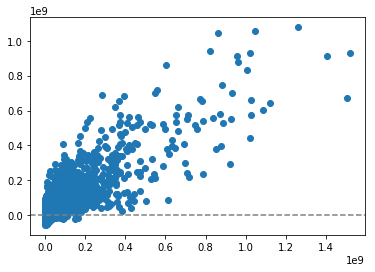

In [133]:
plt.scatter(data.revenue,data.Revenue_predicted)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.show()


In [134]:
import scipy, scipy.stats

In [137]:
#y = df['Residuals'][pd.notna(df['Residuals'])]
y = data.Revenue_predicted - data.revenue

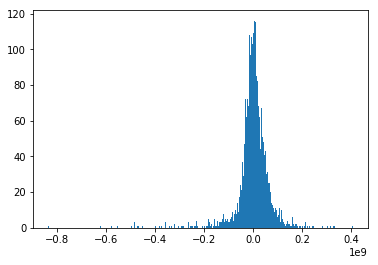

In [202]:
plt.hist(y, bins = 400)
plt.show()

In [180]:
y = y.as_matrix()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [184]:
#fig = plot_leverage_resid2(m, ax=ax)

In [185]:
#fig = influence_plot(m, ax=ax)

In [186]:
data['Residuals'].describe()

count    2.986000e+03
mean    -9.131960e+03
std      7.489722e+07
min     -8.349608e+08
25%     -1.983232e+07
50%      3.289947e+06
75%      3.029113e+07
max      4.076754e+08
Name: Residuals, dtype: float64

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,data['revenue'],test_size=0.3,random_state=101)

In [189]:
lm = LinearRegression()

In [190]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
results = lm.fit(X_train,y_train)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [ 2.32205451e+00 -9.53841983e+03 -5.16435999e+06  1.75055643e+02
  2.71126566e+01  1.60297493e+07 -2.87751072e+06  4.76017322e+07
  3.24980940e+05 -1.04315219e+05 -2.47946764e+06  1.97993746e+06
  1.99304718e+07  2.63972229e+07  1.95501725e+07 -1.15880725e+07
  1.71259015e+07  6.91305272e+07  1.67645236e+08  9.80022945e+07
  2.28422049e+08  3.25067509e+07  7.10076020e+07  1.97756228e+07
  2.02457410e+05  1.99633719e+07]


In [193]:
X_test.shape

(896, 26)

In [194]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

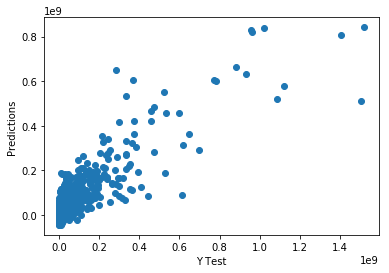

In [195]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [196]:
resid = y_test - predictions

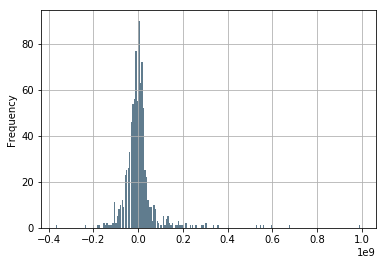

In [197]:
resid.plot.hist(grid=True, bins=200, rwidth=0.9,
                   color='#607c8e')
#Residuals seem normally distributed

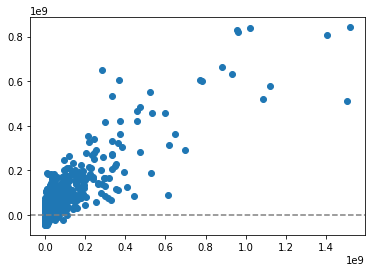

In [137]:
plt.scatter(y_test, predictions)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.show()
#Residuals seem randomly distributed for lower range of budget, care should be used when predicting for bigger budgets.

In [138]:
from sklearn import metrics

In [139]:
#print('MSE: ',metrics.mean_squared_error(df['revenue'],df['Revenue_predicted']))

In [140]:
#print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [141]:
#sns.distplot((y_test-predictions),bins=50)

In [142]:
#coefficients = pd.DataFrame(lm.coef_,X.columns)
#coefficients.columns = ['Coefficients']
#coefficients

In [143]:
#scipy.stats.probplot(y_test.iloc[:,1],plot=plt)
#plt.show()

## SKLEARN MODELS

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

### TRAIN TEST SPLIT

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
df['budget_to_year'] = df['budget'] / df['year']
df['budget_to_year_year'] = df['budget_to_year']/ df['year']

In [147]:
df.columns[:23]

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [148]:
#prepare data for sk-learn models
data = df.drop(['id','belongs_to_collection', 'genres', 'homepage','imdb_id', 'original_language', 'original_title','overview',
               'poster_path','production_companies','production_countries','spoken_languages','status','tagline', 'title', 
                'Keywords','cast','crew', 'sqrt2_revenue', 'log_revenue','sqrt_revenue','release_date'], axis=1).dropna()

In [149]:
X = data.drop('revenue',axis=1)
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [150]:
#check nan 
np.array(data.isnull().sum()).sum()

0

### LINEAR REGRESSION

In [151]:
m = LinearRegression().fit(X_train,y_train)

preds = m.predict(X_test)

In [152]:
print('RMSE: ', rmse(y_test,preds))

RMSE:  77455952.20326732


### RANDOM FOREST REGRESSOR

In [153]:
list_of_rmse = []

# Will take some time
for i in range(1,50):
    randomforest = RandomForestRegressor(n_estimators=i).fit(X_train,y_train)
    pred_i = randomforest.predict(X_test)
    list_of_rmse.append(rmse(y_test,pred_i))

Text(0, 0.5, 'RMSE')

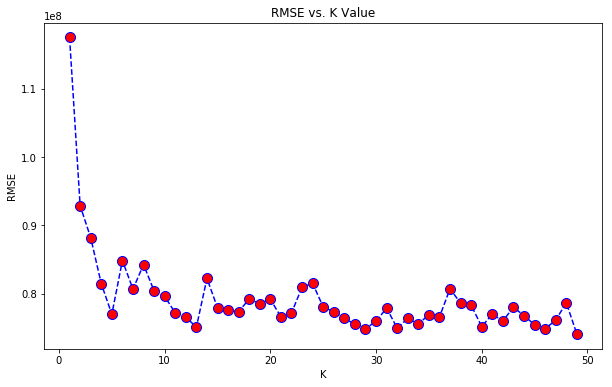

In [154]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),list_of_rmse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')

In [155]:
print('The minimal value of RMSE is: ', min(list_of_rmse))

The minimal value of RMSE is:  74126232.95210117


### PRINCIPAL COMPONENT ANALYSIS

In [156]:
from sklearn.decomposition import PCA

In [157]:
X = data.drop('revenue',axis=1)
y = data['revenue']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [158]:
pca = PCA(n_components=2)

In [159]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [160]:
#x_pca = pca.transform(scaled_X)
x_pca = pca.transform(X)

In [161]:
data_pca = pd.DataFrame(data=x_pca,columns=['pca1','pca2'])

In [162]:
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.30)

In [163]:
m = LinearRegression().fit(X_train,y_train)

preds = m.predict(X_test)

In [164]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,preds)))

RMSE: 86861534.55836879
